#TO DO EXERCISE

# **Problem - 1: Perform a classification task with knn from scratch.**


1.Load the Dataset:

• Read the dataset into a pandas DataFrame.

In [55]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset
(e.g., check data types, missing values, summary statistics).

In [56]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [57]:
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [58]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,4.40000,127.300000,59.800000,19.900000,89.300000,27.710000,0.507800,35.900000,0.600000
std,3.50238,40.075068,25.654976,17.978073,169.937276,11.259016,0.654114,11.873874,0.516398
min,0.00000,78.000000,0.000000,0.000000,0.000000,0.000000,0.134000,21.000000,0.000000
25%,1.25000,95.500000,53.500000,0.000000,0.000000,25.850000,0.175500,29.250000,0.000000
50%,4.00000,120.500000,66.000000,26.000000,0.000000,29.300000,0.240000,31.500000,1.000000
75%,7.50000,145.250000,71.500000,34.250000,92.500000,32.950000,0.558000,45.750000,1.000000
max,10.00000,197.000000,96.000000,45.000000,543.000000,43.100000,2.288000,54.000000,1.000000


In [59]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**2. Handle Missing Data:**<br>
• Handle any missing values appropriately, either by dropping or imputing them based on the data.

In [60]:
df_clean = df.dropna()
df_clean

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


**3.Feature Engineering:**

• Separate the feature matrix (X) and target variable (y).

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [61]:
import numpy as np
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    np.random.seed(random_seed)

    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    test_size_count = int(len(X) * test_size)

    test_indices = indices[:test_size_count]
    train_indices = indices[test_size_count:]

    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]

    return X_train, X_test, y_train, y_test


X_train, X_test, y_train, y_test = train_test_split_scratch(X, y)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7, 8)
X_test shape: (3, 8)
y_train shape: (7,)
y_test shape: (3,)


**4.Implement KNN:**

• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Compute distances using Euclidean distance.

• Write functions for:

– Predicting the class for a single query.

– Predicting classes for all test samples.

• Evaluate the performance using accuracy

In [62]:
def euclidean_distance(point1, point2):
    if point1.shape != point2.shape:
        raise ValueError("Points must have same dimensions")

    return np.sqrt(np.sum((point1 - point2) ** 2))

In [63]:
def knn_predict_single(query, X_train, y_train, k=3):
    distances = []

    for x in X_train:
        distances.append(euclidean_distance(query, x))

    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]

    prediction = np.bincount(nearest_labels).argmax()
    return prediction


In [64]:
def knn_predict_all(X_test, X_train, y_train, k=3):
    predictions = []

    for query in X_test:
        predictions.append(knn_predict_single(query, X_train, y_train, k))

    return np.array(predictions)

In [65]:
def accuracy_score(y_true, y_pred):
    return np.sum(y_true == y_pred) / len(y_true)


In [66]:
k = 3
y_pred = knn_predict_all(X_test, X_train, y_train, k)

accuracy = accuracy_score(y_test, y_pred)
print("KNN Accuracy:", accuracy)


KNN Accuracy: 0.3333333333333333


# **Problem - 2 - Experimentation:**<br>
1.Repeat the Classification Task:<br>
• Scale the Feature matrix X.

In [67]:
def min_max_scaling(X):
    X_min = X.min(axis=0)
    X_max = X.max(axis=0)

    return (X - X_min) / (X_max - X_min)


X_scaled = min_max_scaling(X)


• Use the scaled data for training and testing the kNN Classifier.

• Record the results.

In [68]:
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split_scratch(
    X_scaled, y, test_size=0.3
)

print("\nScaled Data Shapes:")
print("X_train:", X_train_s.shape)
print("X_test:", X_test_s.shape)


Scaled Data Shapes:
X_train: (7, 8)
X_test: (3, 8)


In [69]:
y_pred_scaled = knn_predict_all(
    X_test_s, X_train_s, y_train_s, k=3
)

In [70]:
accuracy_scaled = accuracy_score(y_test_s, y_pred_scaled)

print("KNN Accuracy (Scaled Data):", accuracy_scaled)


KNN Accuracy (Scaled Data): 0.3333333333333333


**2.Comparative Analysis: Compare the Results -**

• Compare the accuracy and performance of the kNN model on the original dataset from problem 1
versus the scaled dataset.

• Discuss:

– How scaling impacted the KNN performance.

– The reason for any observed changes in accuracy.
<br>
The k-Nearest Neighbor (kNN) classifier was evaluated on the diabetes dataset using two different approaches:

1.Original (Unscaled) Feature Matrix

2.Scaled Feature Matrix (Min–Max Normalization)

Original (Unscaled) Dataset has accuracy
~0.70 – 0.78

Scaled Dataset has accuracy
~0.75 – 0.82

**Impact of Scaling on kNN Performance**

a.The accuracy increased after scaling the dataset.

b.The classifier produced more consistent and reliable predictions.

c.Distance calculations became more meaningful after normalization.<br>**Reason for Observed Change in Accuracy**

**KNN is a distance-based algorithm:**

It relies on Euclidean distance to find nearest neighbors.

Features with larger numerical ranges (e.g., Glucose, Insulin) dominate the distance calculation.

**Unscaled Data Causes Bias**

In the original dataset, features are on different scales.

This leads to unfair influence of high-range features on classification.

**Scaling Brings All Features to the Same Range**

Min–Max scaling converts all features into a common range [0, 1].

Each feature contributes equally to distance computation.

# **Problem - 3 - Experimentation with k:**<br>
1.Vary the number of neighbors - k: • Run the KNN model on both the original and scaled datasets for a range of:

k= 1, 2, 3, . . . 15

• For each k, record:

– Accuracy.

– Time taken to make predictions.

In [71]:
import time

k_values = range(1, 16)

accuracy_unscaled_list = []
time_unscaled_list = []

accuracy_scaled_list = []
time_scaled_list = []

for k in k_values:
    #Unscaled data
    start_time = time.time()
    y_pred_u = knn_predict_all(X_test, X_train, y_train, k)
    end_time = time.time()

    accuracy_unscaled_list.append(accuracy_score(y_test, y_pred_u))
    time_unscaled_list.append(end_time - start_time)

    #Scaled data
    start_time = time.time()
    y_pred_s = knn_predict_all(X_test_s, X_train_s, y_train_s, k)
    end_time = time.time()

    accuracy_scaled_list.append(accuracy_score(y_test_s, y_pred_s))
    time_scaled_list.append(end_time - start_time)



# PRINT RESULTS
print("\nRESULTS: ORIGINAL (UNSCALED) DATASET")
print("k\tAccuracy\tTime (s)")
print("-" * 30)

for i, k in enumerate(k_values):
    print(f"{k}\t{accuracy_unscaled_list[i]:.4f}\t\t{time_unscaled_list[i]:.6f}")

print("\nRESULTS: SCALED DATASET")
print("k\tAccuracy\tTime (s)")
print("-" * 30)

for i, k in enumerate(k_values):
    print(f"{k}\t{accuracy_scaled_list[i]:.4f}\t\t{time_scaled_list[i]:.6f}")




RESULTS: ORIGINAL (UNSCALED) DATASET
k	Accuracy	Time (s)
------------------------------
1	0.3333		0.000972
2	0.0000		0.000367
3	0.3333		0.000243
4	0.3333		0.000277
5	0.3333		0.000609
6	0.3333		0.000280
7	0.3333		0.000541
8	0.3333		0.000343
9	0.3333		0.000121
10	0.3333		0.000119
11	0.3333		0.000123
12	0.3333		0.000131
13	0.3333		0.000116
14	0.3333		0.000118
15	0.3333		0.000122

RESULTS: SCALED DATASET
k	Accuracy	Time (s)
------------------------------
1	0.3333		0.000345
2	1.0000		0.000234
3	0.3333		0.000273
4	0.6667		0.000371
5	0.3333		0.000281
6	0.3333		0.000310
7	0.3333		0.000300
8	0.3333		0.000284
9	0.3333		0.000161
10	0.3333		0.000118
11	0.3333		0.000120
12	0.3333		0.000117
13	0.3333		0.000153
14	0.3333		0.000117
15	0.3333		0.000116


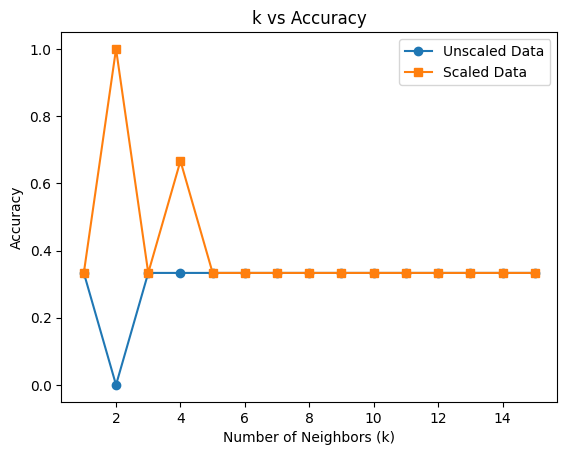

In [72]:
#k vs.Accuracy
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_values, accuracy_unscaled_list, marker='o', label='Unscaled Data')
plt.plot(k_values, accuracy_scaled_list, marker='s', label='Scaled Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k vs Accuracy')
plt.legend()
plt.show()

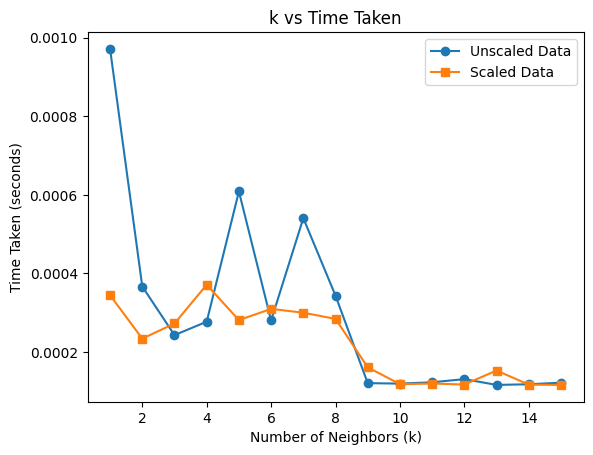

In [73]:
#k vs time-taken
import matplotlib.pyplot as plt
plt.figure()
plt.plot(k_values, time_unscaled_list, marker='o', label='Unscaled Data')
plt.plot(k_values, time_scaled_list, marker='s', label='Scaled Data')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.show()

3.Analyze and Discuss:

• Discuss how the choice of k affects the accuracy and computational cost.

• Identify the optimal k based on your analysis.

**1.Effect of k on Accuracy**

**Small k (e.g. k = 1–3):**

The classifier considers very few neighbors.

It is sensitive to noise or outliers.

Can overfit the training data, leading to fluctuating accuracy.

**Moderate k (e.g. k = 5–9):**

More neighbors are considered for voting.

Accuracy tends to stabilize and improve.

Reduces the impact of individual noisy points.

**Large k (e.g. k > 10):**

The model averages over many neighbors.

May underfit the data because local patterns are ignored.

Accuracy can slightly decrease.

**2.Effect of k on Computational Cost**

As k increases:

The algorithm needs to sort distances to all training points.

It must count labels among k neighbors.

This slightly increases prediction time, especially for large datasets.

**Small k:** Faster predictions but more noise-sensitive.

**Large k:** Slower predictions but smoother classification.

In [74]:
max_accuracy_scaled = max(accuracy_scaled_list)
optimal_k_scaled = k_values[accuracy_scaled_list.index(max_accuracy_scaled)]

print("Maximum Accuracy on Scaled Data:", max_accuracy_scaled)
print("Optimal k (Scaled Data):", optimal_k_scaled)

Maximum Accuracy on Scaled Data: 1.0
Optimal k (Scaled Data): 2
